In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_style('whitegrid')

Data Source: downloaded from Kaggle.com
    link: https://www.kaggle.com/datasets/vinayshaw/sales-analysis
##### Thanks Keith Galli for your great YouTube video

In [3]:
df = pd.read_csv('./SalesAnalysis.csv')

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
df.shape

(186850, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Data Cleaning

#### Missing value

In [7]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
# Find all the rows with NaN values
df[df['Order ID'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Remove the rows that contains all NaN values. We have 545 rows like that
df.dropna(axis = 0, how='all', inplace=True)
print(df.shape)

(186305, 6)


In [10]:
df.isnull().sum() # No missing values

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [12]:
# We have to reset indices
df.reset_index(drop = True, inplace=True)
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [13]:
# We have some rows that contains only the column names. We have to delete all such rows
df[(df['Order Date']=='Order Date')].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:
df[(df['Order Date']=='Order Date')].shape

(355, 6)

In [15]:
df = df[~(df['Order Date']=='Order Date')]
df.shape

(185950, 6)

### Q1: What was the best month for sales? How much was earned in that month?

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%m/%d/%y %H:%M')
df['Order Date'].dtype

dtype('<M8[ns]')

In [17]:
df['Order Month'] = df['Order Date'].dt.month
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4


In [18]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186304
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Order Month       185950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 11.3+ MB


In [19]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [20]:
df.groupby('Order Month')['Sales'].sum()

Order Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

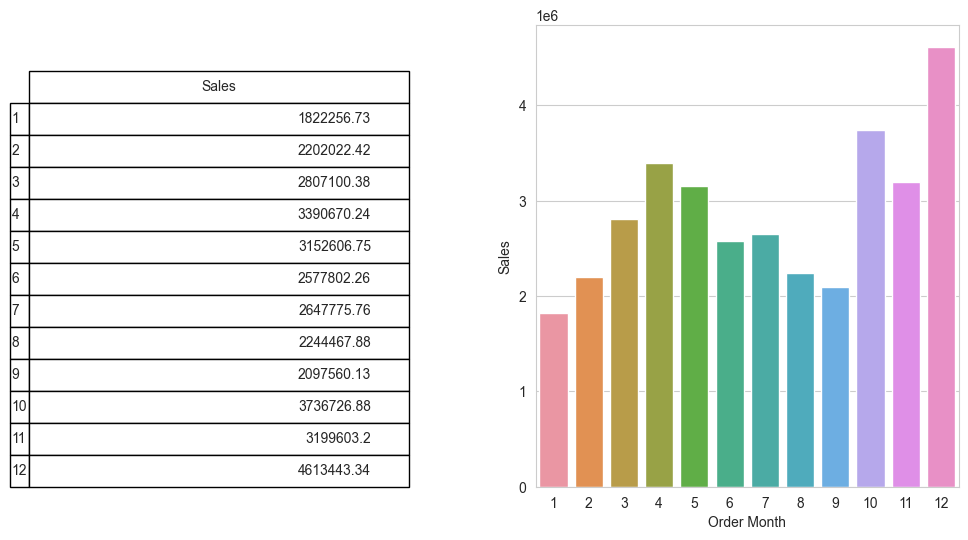

In [21]:
month_data = round(df.groupby('Order Month')['Sales'].sum(),2).to_frame()

fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(121)
ax1.axis('off')
bbox =[0,0,0.9,0.9]
ax1.table(cellText = month_data.values, rowLabels=month_data.index, colLabels=month_data.columns,bbox=bbox)
ax2 = fig.add_subplot(122)
sns.barplot(data = month_data, x=month_data.index,y=month_data['Sales'])
plt.show()

### What city has the highest number of sales?

In [22]:
df['City'] =df['Purchase Address'].str.split(',').str[1]
df['City'].value_counts()

 San Francisco    44732
 Los Angeles      29605
 New York City    24876
 Boston           19934
 Atlanta          14881
 Dallas           14820
 Seattle          14732
 Portland         12465
 Austin            9905
Name: City, dtype: int64

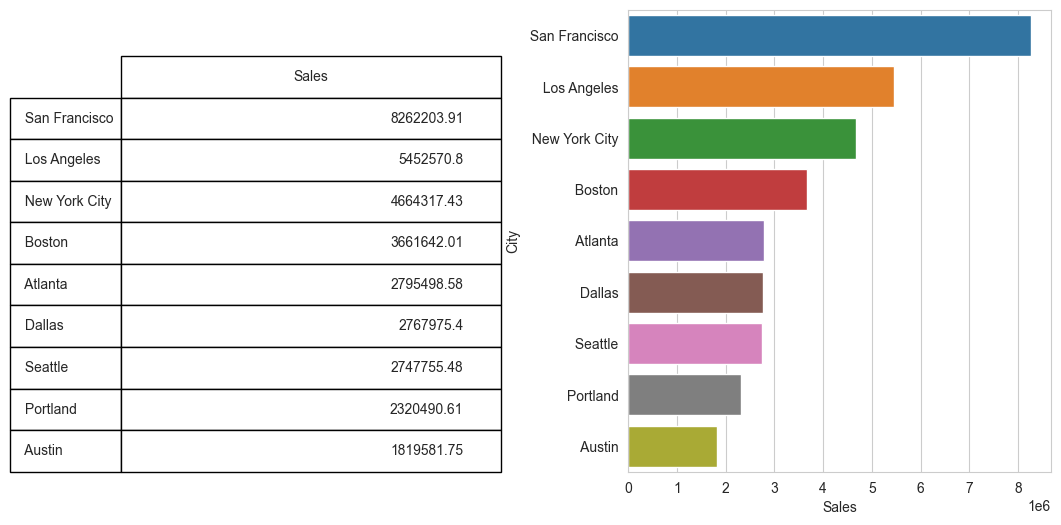

In [23]:
sales_data =round(df.groupby('City')['Sales'].sum().sort_values(ascending=False),2).to_frame()

fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(121)
ax1.axis('off')
bbox =[0,0,0.9,0.9]
ax1.table(cellText = sales_data.values, rowLabels=sales_data.index, colLabels=sales_data.columns,bbox=bbox)
ax2 = fig.add_subplot(122)
sns.barplot(data = sales_data, y=sales_data.index,x=sales_data['Sales'])
# plt.xticks(rotation= 45)
plt.show()

### What time should we display advertisement to increase the likelihood to buy products?

In [24]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston


In [25]:
df['Order Date'].dt.hour

0          8
1         22
2         14
3         14
4          9
          ..
186300    20
186301    16
186302     7
186303    17
186304     0
Name: Order Date, Length: 185950, dtype: int64

In [26]:
df['Order Hour'] = df['Order Date'].dt.hour
df['Order Minute']= df['Order Date'].dt.minute

In [27]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,Order Hour,Order Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30


<AxesSubplot: xlabel='Order Hour'>

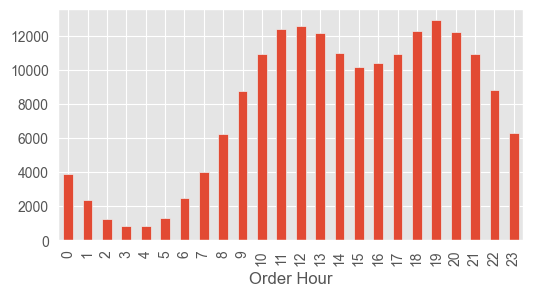

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=(6,3))
df.groupby('Order Hour')['Sales'].count().plot(kind= 'bar')

### What product sold the most? Why do you think it sold the most?

In [29]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,Order Hour,Order Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30


In [30]:
most_sold_item = df.groupby('Product').agg({'Quantity Ordered':'sum', 'Price Each' : 'mean'})\
                .sort_values(by= 'Quantity Ordered' ,ascending= False)
most_sold_item

,Quantity Ordered,Price Each
Product,,
AAA Batteries (4-pack),31017,2.99
AA Batteries (4-pack),27635,3.84
USB-C Charging Cable,23975,11.95
Lightning Charging Cable,23217,14.95
Wired Headphones,20557,11.99
Apple Airpods Headphones,15661,150.00
Bose SoundSport Headphones,13457,99.99
27in FHD Monitor,7550,149.99
iPhone,6849,700.00


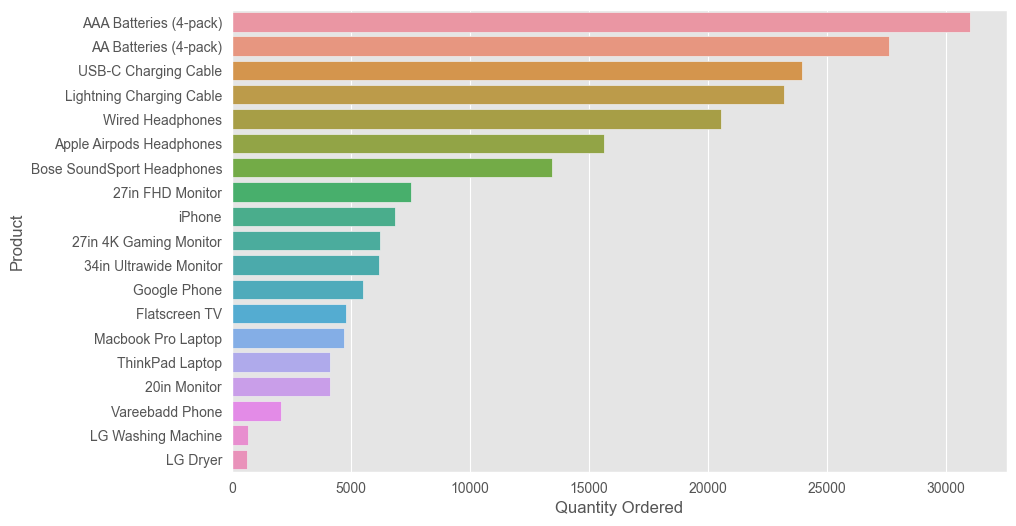

In [31]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data = most_sold_item, y=most_sold_item.index,x=most_sold_item['Quantity Ordered'])
# plt.xticks(rotation= 45)
plt.show()

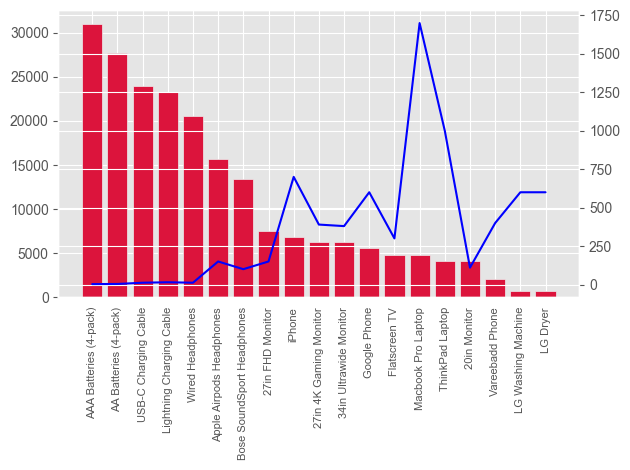

In [32]:
plt.style.use('ggplot')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(most_sold_item.index, most_sold_item['Quantity Ordered'],color='crimson')
ax1.set_xticklabels(most_sold_item.index, rotation='vertical',size= 8)
ax2.plot(most_sold_item.index, most_sold_item['Price Each'],'b')

fig.tight_layout()
plt.show()

### What product most often sold together?

In [33]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,Order Hour,Order Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30


In [34]:
data = df[df['Order ID'].duplicated(keep = False)] 

In [35]:
data['Grouped'] = data.groupby('Order ID')['Product'].transform(lambda x : ', '.join(x))
data['Grouped']

2                            Google Phone, Wired Headphones
3                            Google Phone, Wired Headphones
17                       Google Phone, USB-C Charging Cable
18                       Google Phone, USB-C Charging Cable
29        Bose SoundSport Headphones, Bose SoundSport He...
                                ...                        
186248        34in Ultrawide Monitor, AA Batteries (4-pack)
186259             Wired Headphones, AAA Batteries (4-pack)
186260             Wired Headphones, AAA Batteries (4-pack)
186296                   Google Phone, USB-C Charging Cable
186297                   Google Phone, USB-C Charging Cable
Name: Grouped, Length: 14649, dtype: object

In [36]:
data = data[['Order ID', 'Grouped']].drop_duplicates()

In [37]:
data

,Order ID,Grouped
2,176560,"Google Phone, Wired Headphones"
17,176574,"Google Phone, USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176586,"AAA Batteries (4-pack), Google Phone"
118,176672,"Lightning Charging Cable, USB-C Charging Cable"
...,...,...
186237,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
186239,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
186247,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186259,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [38]:
from itertools import combinations
from collections import Counter

In [39]:
count = Counter()
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(combinations(row_list,2))
for key, value in count.most_common(10):
    print(key,': ', value)

('iPhone', ' Lightning Charging Cable') :  1005
('Google Phone', ' USB-C Charging Cable') :  987
('iPhone', ' Wired Headphones') :  447
('Google Phone', ' Wired Headphones') :  414
('Vareebadd Phone', ' USB-C Charging Cable') :  361
('iPhone', ' Apple Airpods Headphones') :  360
('Google Phone', ' Bose SoundSport Headphones') :  220
('Vareebadd Phone', ' Wired Headphones') :  143
(' USB-C Charging Cable', ' Wired Headphones') :  120
('Vareebadd Phone', ' Bose SoundSport Headphones') :  80
